In [1]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filter

""" gaussian filter of histogram """
def gf(P):
  return filter.gaussian_filter(P, sigma=2.0)

In [2]:
f = open('../paper_results_paths.json')
datalocs = json.load(f)

In [3]:
# the indices (1,2) would refer to (150914, 200129) respectively for this analysis

df1 = np.genfromtxt(datalocs['cEFT']['spin0']['GW150914'], names=True, dtype=None)
df2 = np.genfromtxt(datalocs['cEFT']['spin0']['GW200129'], names=True, dtype=None)

In [4]:
# priors ranges

pr1range = [0, 80]
pr2range = [0, 80]

Nbins = 50

In [5]:
lbins1 = np.linspace(pr1range[0], pr1range[1], Nbins)
lintp1 = (lbins1[:-1] + lbins1[1:])/2.

lbins2 = np.linspace(pr2range[0], pr2range[1], Nbins)
lintp2 = (lbins2[:-1] + lbins2[1:])/2.

dl1 = np.mean(np.diff(lbins1))
dl2 = np.mean(np.diff(lbins2))

In [6]:
print(dl1)

1.6326530612244898


In [7]:
# prior histograms

prl1, lbins1 = np.histogram(np.random.uniform(pr1range[0], pr1range[1], 100000), bins=lbins1, density=True)
prl2, lbins2 = np.histogram(np.random.uniform(pr2range[0], pr2range[1], 100000), bins=lbins1, density=True)

In [8]:
# posterior histograms

Pl1, lbins1 = np.histogram(df1['alphangr'], bins=lbins1, density=True)
Pl2, lbins2 = np.histogram(df2['alphangr'], bins=lbins2, density=True)

In [9]:
# likelihoods

likel1 = Pl1/prl1
likel2 = Pl2/prl2

likel1 /= np.sum(likel1) * dl1
likel2 /= np.sum(likel2) * dl2

In [10]:
# joint likelihood

likel = likel1*likel2
likel /= np.sum(likel) * dl1 # chose dl1 because dl1=dl2

# joint posterior
Pl = likel * prl1 # chose one of the priors because they were identical
Pl /= np.sum(Pl) * dl1 # chose dl1 because dl1=dl2

(0.0, 0.03)

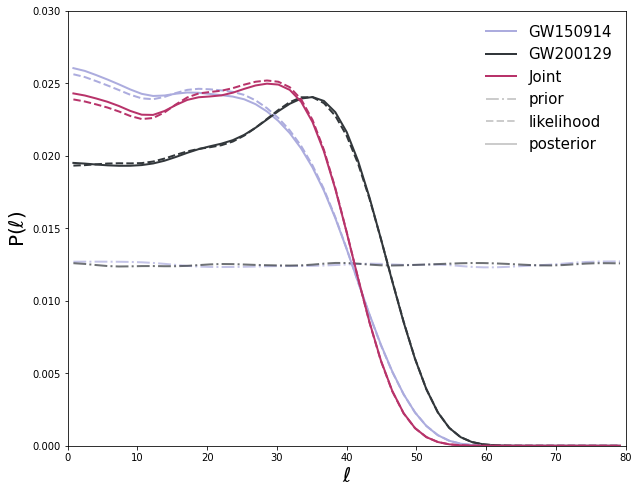

In [11]:
c = ["#acacde", "#32373b", "#b8336a"]

plt.figure(figsize=(10,8))

plt.plot(lintp1, gf(prl1), color=c[0], ls='dashdot', lw=2, alpha=0.7)
plt.plot(lintp2, gf(prl2), color=c[1], ls='dashdot', lw=2, alpha=0.7)
plt.plot(lintp1, gf(Pl1), color=c[0], lw=2)
plt.plot(lintp2, gf(Pl2), color=c[1], lw=2)
plt.plot(lintp1, gf(likel1), color=c[0], ls='dashed', lw=2)
plt.plot(lintp2, gf(likel2), color=c[1], ls='dashed', lw=2)

plt.plot(lintp2, gf(likel), color=c[2], ls='dashed', lw=2)
plt.plot(lintp2, gf(Pl), color=c[2], lw=2)


plt.plot(0, 0, color='#acacde', lw=2, label='GW150914')
plt.plot(0, 0, color='#32373b', lw=2, label='GW200129')
plt.plot(0, 0, color='#b8336a', lw=2, label='Joint')

plt.plot(0, 0, color='k', ls='dashdot', lw=2, label='prior', alpha=0.2)
plt.plot(0, 0, color='k', ls='dashed', lw=2, label='likelihood', alpha=0.2)
plt.plot(0, 0, color='k', lw=2, label='posterior', alpha=0.2)

plt.legend(loc='upper right', frameon=False, fontsize=15)

plt.xlabel('$\ell$', fontsize=20)
plt.ylabel('P($\ell$)', fontsize=20)

plt.xlim([0,80])
plt.ylim([0,0.03])

Wrap the above in a function:

In [102]:
def joint_likelihood_and_posterior(df1, df2, pr1max, pr2max):
    
    import scipy.ndimage.filters as filter
    from scipy.interpolate import InterpolatedUnivariateSpline as ius
    
    def gf(P):
        return filter.gaussian_filter(P, sigma=2.0)

    # priors ranges
    pr1range = [0, pr1max]
    pr2range = [0, pr2max]

    Nbins = 50
    
    lbins1 = np.linspace(pr1range[0], pr1range[1], Nbins)
    lintp1 = (lbins1[:-1] + lbins1[1:])/2.

    lbins2 = np.linspace(pr2range[0], pr2range[1], Nbins)
    lintp2 = (lbins2[:-1] + lbins2[1:])/2.

    dl1 = np.mean(np.diff(lbins1))
    dl2 = np.mean(np.diff(lbins2))
    
    # prior histograms
    prl1, lbins1 = np.histogram(np.random.uniform(pr1range[0], pr1range[1], 100000), bins=lbins1, density=True)
    prl2, lbins2 = np.histogram(np.random.uniform(pr2range[0], pr2range[1], 100000), bins=lbins1, density=True)
    
    # posterior histograms
    Pl1, lbins1 = np.histogram(df1['alphangr'], bins=lbins1, density=True)
    Pl2, lbins2 = np.histogram(df2['alphangr'], bins=lbins2, density=True)
    
    # likelihoods
    likel1 = Pl1/prl1
    likel2 = Pl2/prl2

    likel1 /= np.sum(likel1) * dl1
    likel2 /= np.sum(likel2) * dl2
    
    # HS: Abhirup, if dl1 \neq dl2, which one should we use?
    # joint likelihood
    likel = likel1*likel2
    likel /= np.sum(likel) * dl1 # chose dl1 because dl1=dl2

    # joint posterior
    Pl = likel * prl1 # chose one of the priors because they were identical
    Pl /= np.sum(Pl) * dl1 # chose dl1 because dl1=dl2
    
    l_vals = np.arange(0, pr1max + 1)
    jlike = gf(likel)
    jpost = gf(Pl)
    
    jlike_interp = ius(lintp1, jlike, k=1)
    jpost_interp = ius(lintp1, jpost, k=1)
    
    print(jlike_interp.integral(0, pr1max))
    
    plt.plot(lintp1, gf(likel))
    plt.plot(l_vals, jlike_interp(l_vals))
    
    plt.plot(lintp1, gf(Pl))
    plt.plot(l_vals, jpost_interp(l_vals))
    
    
    return l_vals, jlike_interp(l_vals) / jlike_interp.integral(l_vals.min(), l_vals.max()), jpost_interp(l_vals) / jpost_interp.integral(l_vals.min(), l_vals.max())

0.9800258356204486


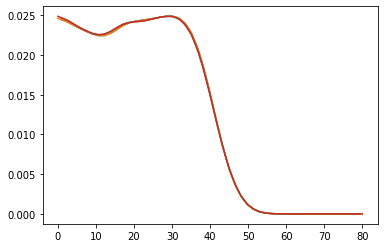

In [103]:
l_vals, j_like, j_post = joint_likelihood_and_posterior(df1, df2, 80., 80.)

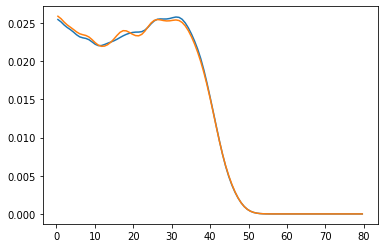

In [37]:
plt.plot(lp1, gf(jlike))
plt.plot(lp1, gf(jpost))

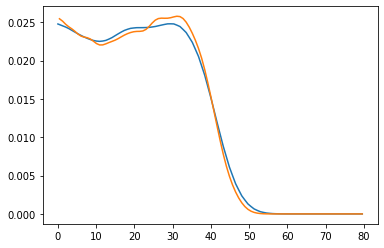

In [92]:
plt.plot(l_vals, j_like)
plt.plot(lp1, gf(jlike))

In [62]:
lp1

array([ 0.4040404 ,  1.21212121,  2.02020202,  2.82828283,  3.63636364,
        4.44444444,  5.25252525,  6.06060606,  6.86868687,  7.67676768,
        8.48484848,  9.29292929, 10.1010101 , 10.90909091, 11.71717172,
       12.52525253, 13.33333333, 14.14141414, 14.94949495, 15.75757576,
       16.56565657, 17.37373737, 18.18181818, 18.98989899, 19.7979798 ,
       20.60606061, 21.41414141, 22.22222222, 23.03030303, 23.83838384,
       24.64646465, 25.45454545, 26.26262626, 27.07070707, 27.87878788,
       28.68686869, 29.49494949, 30.3030303 , 31.11111111, 31.91919192,
       32.72727273, 33.53535354, 34.34343434, 35.15151515, 35.95959596,
       36.76767677, 37.57575758, 38.38383838, 39.19191919, 40.        ,
       40.80808081, 41.61616162, 42.42424242, 43.23232323, 44.04040404,
       44.84848485, 45.65656566, 46.46464646, 47.27272727, 48.08080808,
       48.88888889, 49.6969697 , 50.50505051, 51.31313131, 52.12121212,
       52.92929293, 53.73737374, 54.54545455, 55.35353535, 56.16

In [65]:
new_lp1 = np.append([0], lp1)

In [66]:
new_lp1

array([ 0.        ,  0.4040404 ,  1.21212121,  2.02020202,  2.82828283,
        3.63636364,  4.44444444,  5.25252525,  6.06060606,  6.86868687,
        7.67676768,  8.48484848,  9.29292929, 10.1010101 , 10.90909091,
       11.71717172, 12.52525253, 13.33333333, 14.14141414, 14.94949495,
       15.75757576, 16.56565657, 17.37373737, 18.18181818, 18.98989899,
       19.7979798 , 20.60606061, 21.41414141, 22.22222222, 23.03030303,
       23.83838384, 24.64646465, 25.45454545, 26.26262626, 27.07070707,
       27.87878788, 28.68686869, 29.49494949, 30.3030303 , 31.11111111,
       31.91919192, 32.72727273, 33.53535354, 34.34343434, 35.15151515,
       35.95959596, 36.76767677, 37.57575758, 38.38383838, 39.19191919,
       40.        , 40.80808081, 41.61616162, 42.42424242, 43.23232323,
       44.04040404, 44.84848485, 45.65656566, 46.46464646, 47.27272727,
       48.08080808, 48.88888889, 49.6969697 , 50.50505051, 51.31313131,
       52.12121212, 52.92929293, 53.73737374, 54.54545455, 55.35